# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel K\
_Student No._: 2021-07451\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 23/05/2024 11:59PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JED JERREL ESCARAN**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

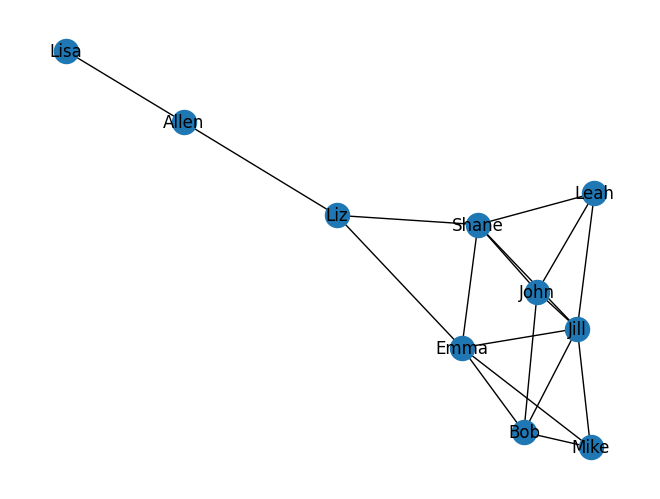

In [17]:
import networkx as nx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()

people = ['Mike', 'Bob', 'Emma', 'Jill', 'Liz', 'Allen', 'Lisa', 'John', 'Shane', 'Leah']
G.add_nodes_from(people)

connections = [('Mike', 'Bob'), ('Mike', 'Jill'), ('Mike', 'Emma'),
               ('Bob', 'Emma'), ('Bob', 'Jill'), ('Bob', 'John'),
               ('John', 'Jill'), ('John', 'Shane'), ('John', 'Leah'),
               ('Leah', 'Jill'), ('Leah', 'Shane'), ('Shane', 'Jill'),
               ('Shane', 'Emma'), ('Shane', 'Liz'), ('Emma', 'Jill'),
               ('Emma', 'Liz'), ('Liz', 'Allen'), ('Allen', 'Lisa'), ]
G.add_edges_from(connections)

# draw the graph
nx.draw(G, with_labels=True)

# convert combinations object to a list
pairs = list(combinations(people, 2))


this is the drawing of the given network, with nodes from "people" and the edges/connections from "connections". i also used combinations from itertools to get all possible pairs from all the nodes for future use.

### Calculating diameter

In [18]:
diameter = 0

for pair in pairs:
    node1, node2 = pair
    shortest_path = nx.shortest_path(G, node1, node2)
    if len(shortest_path) >= diameter:
      diameter = len(shortest_path)

print(diameter-1)

4


the longest shortest path or the longest geodesic distance was checked for all pairs. the length of the longest geodesic distance between two nodes is the diameter of the network. to check we use nx.diameter

In [19]:
print(nx.diameter(G))

4


### calculating density

In [20]:
nodes = len(G.nodes())
edges = len(G.edges())
print((2*edges)/(nodes*(nodes-1)))

0.4


the formula i used represents the proportion of the actual number of edges to the maximum number of possible edges in the network. A density of 1 indicates a fully connected network, while a density closer to 0 indicates a sparsely connected network. to check we use nx.density

In [21]:
print(nx.density(G))

0.4


### calculating degree


In [22]:
deg = np.array([])
for i,a in enumerate(people):
  d = G.degree(a)
  deg = np.append(deg,d)
  print(str(a) + ": " + str(d))
print("Average degree: " + str(deg.mean()))


Mike: 3
Bob: 4
Emma: 5
Jill: 6
Liz: 3
Allen: 2
Lisa: 1
John: 4
Shane: 5
Leah: 3
Average degree: 3.6


in calculating average degree, we first count the number of edges that is connected to a node. we do this for all nodes to find the average degree.



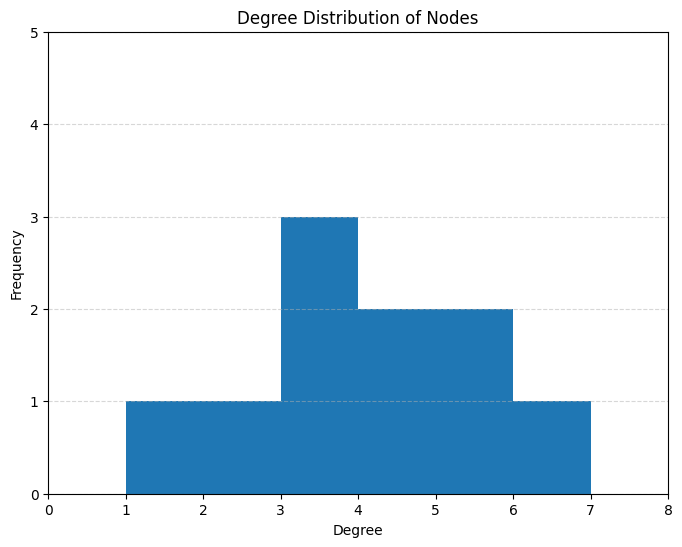

In [23]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(8, 6))

plt.hist(degrees, bins=range(max(degrees) + 2))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Nodes')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 8)
plt.ylim(0, 5)

plt.show()

Plotting the degree distribution of nodes. degree 3 is the most frequent, with 3 nodes having that degree.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [24]:
import pandas as pd

degrees = {person: G.degree(person) for person in people} # counting degrees for each person
normalized_degrees = {key: np.round(value / max(degrees.values()),2) for key, value in degrees.items()} #normalizing

betweenness_centrality = nx.betweenness_centrality(G)

closeness_centrality = nx.closeness_centrality(G)

degree centrality is the number of a nodes direct connections to other nodes which shows how central a node is


In [25]:
normalized_degrees

{'Mike': 0.5,
 'Bob': 0.67,
 'Emma': 0.83,
 'Jill': 1.0,
 'Liz': 0.5,
 'Allen': 0.33,
 'Lisa': 0.17,
 'John': 0.67,
 'Shane': 0.83,
 'Leah': 0.5}

In [26]:
closeness_centrality = {}

nodes = list(G.nodes())

for node in nodes:
    shortest_paths = nx.shortest_path_length(G, source=node)                    #shortest path lengths from the current node to all other nodes
    #print(str(node) + ": " + str(sum(shortest_paths.values())))
    total_distance = sum(shortest_paths.values())                               #sum of shortest path lengths (excluding the node itself)
    #print(total_distance)

    #calculate closeness centrality
    if len(shortest_paths) > 1:
        closeness_centrality[node] = (len(shortest_paths) - 1) / total_distance
    else:
        closeness_centrality[node] = 0.0

for node, centrality in closeness_centrality.items():
    print(f"{node}: {centrality}")

Mike: 0.5
Bob: 0.5294117647058824
Emma: 0.6428571428571429
Jill: 0.6
Liz: 0.6
Allen: 0.42857142857142855
Lisa: 0.3103448275862069
John: 0.5294117647058824
Shane: 0.6428571428571429
Leah: 0.5


closeness centrality calculated by summing geodesic path lenghts and taking reciprocal of average distance. we check using nx.closeness_centrality below


In [27]:
closeness_centrality

{'Mike': 0.5,
 'Bob': 0.5294117647058824,
 'Emma': 0.6428571428571429,
 'Jill': 0.6,
 'Liz': 0.6,
 'Allen': 0.42857142857142855,
 'Lisa': 0.3103448275862069,
 'John': 0.5294117647058824,
 'Shane': 0.6428571428571429,
 'Leah': 0.5}

betweenness centrality measures a nodes "importance". it measures how many geodesic paths of other node pairs pass through the target node. high betweenness centrality means significant influence


In [28]:
betweenness_centrality

{'Mike': 0.0,
 'Bob': 0.023148148148148143,
 'Emma': 0.23148148148148148,
 'Jill': 0.10185185185185183,
 'Liz': 0.38888888888888884,
 'Allen': 0.2222222222222222,
 'Lisa': 0.0,
 'John': 0.023148148148148143,
 'Shane': 0.23148148148148143,
 'Leah': 0.0}

In [29]:
table = {
    "Name" : people,
    "Degree Centrality" : normalized_degrees.values(),
    "Betweenness Centrality" : betweenness_centrality.values(),
    "Closeness Centrality" : closeness_centrality.values()
}
table_df = pd.DataFrame(table)
print(table_df)

    Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0   Mike               0.50                0.000000              0.500000
1    Bob               0.67                0.023148              0.529412
2   Emma               0.83                0.231481              0.642857
3   Jill               1.00                0.101852              0.600000
4    Liz               0.50                0.388889              0.600000
5  Allen               0.33                0.222222              0.428571
6   Lisa               0.17                0.000000              0.310345
7   John               0.67                0.023148              0.529412
8  Shane               0.83                0.231481              0.642857
9   Leah               0.50                0.000000              0.500000


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

using louvain, we obtain the following communities with the following modularity

In [36]:
louvain = nx.community.louvain_communities(G)
print("Communities:", louvain)

modularity = nx.community.modularity(G, louvain)
print(f'Modularity of the partition: {modularity}')

Communities: [{'Bob', 'Emma', 'Mike', 'Jill'}, {'Liz', 'Allen', 'Lisa'}, {'John', 'Shane', 'Leah'}]
Modularity of the partition: 0.22222222222222218


using girvan_newman, we can iterate to check for the community partition with highest modularity

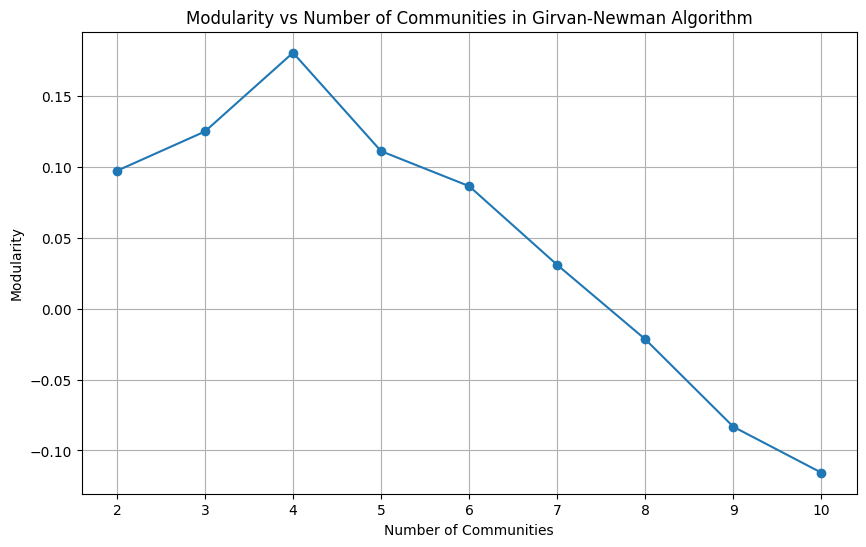

In [37]:
girvan_newman = nx.community.girvan_newman(G)

modularity_values = []
partition_count = []

# iterating over partitions, calculating modularity
for i, partition in enumerate(girvan_newman):
    partition_list = [list(community) for community in partition]
    modularity = nx.community.modularity(G, partition_list)

    modularity_values.append(modularity)
    partition_count.append(len(partition_list))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(partition_count, modularity_values, marker='o', linestyle='-')
plt.xlabel('Number of Communities')
plt.ylabel('Modularity')
plt.title('Modularity vs Number of Communities in Girvan-Newman Algorithm')
plt.grid(True)
plt.show()

from the plot, the highest modularity comes from 3 partitions (which results to 4 communities) which indicates that the graph has dense connections between the nodes within communities but sparse connections between nodes in different communities.

A high modularity score means that the partitioning of the network is very effective in capturing the community structure.